In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Exercice 1 – Tutoriel Networkx

Après avoir installé networkx grace à la commande pip3 install networkx –user, suivez le tutoriel relatif à ce package disponible dans l’espace de cours.

In [2]:
G = nx.DiGraph()
G.add_edges_from([
    ('a', 'b', {'weight': 4}),
    ('a', 'c', {'weight': 2}),
    ('b', 'c', {'weight': 5}),
    ('b', 'd', {'weight': 10}),
    ('c', 'e', {'weight': 3}),
    ('d', 'f', {'weight': 11}),
    ('e', 'd', {'weight': 4}),
    ('e', 'f', {'weight': 14})
    ])

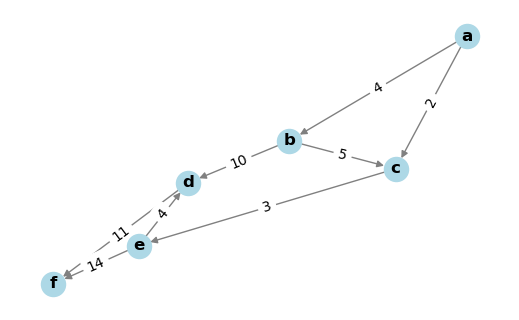

In [11]:
# Generate positions for nodes
pos = nx.spring_layout(G)

# Plot the graph
plt.figure(figsize=(5, 3))
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', edge_color='gray')

# Draw edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

### Exercice 2 – Version récursive

On vous demande dans un premier temps d’implémenter une version récursive de la recherche de plus court chemin depuis un nœud source vers toutes les destinations possibles, qui affiche la longueur de ces chemins.

In [12]:
def Sp_Rec(G, dest, mem):
    if dest in mem: # if the destination has already been calculated
        return mem[dest] # returns from memory

    min_d = float('inf') # inicialize inf

    for pred in G.predecessors(dest): # For each predecessor of the target in the graph
        dist = Sp_Rec(G, pred, mem) 
        dist += G[pred][dest]['weight']  # Checks if there is an edge from pred to dest
        if dist < min_d: 
            min_d = dist

    mem[dest] = min_d # stores the minimum distance in the mem
    
    return mem[dest]

mem = {}
src = 'a'
mem[src] = 0  

for dest in G:
    res= Sp_Rec(G, dest, mem)
    print(f"The shortest path from {src} to {dest}: {res}")


The shortest path from a to a: 0
The shortest path from a to b: 4
The shortest path from a to c: 2
The shortest path from a to d: 9
The shortest path from a to e: 5
The shortest path from a to f: 19


- Se a distância para o nó de destino já estiver no dicionário mem, retornamos diretamente.
- Para cada predecessor do nó de destino, calculamos recursivamente o caminho mais curto até ele, somando o peso da aresta.
- Atualizamos o menor caminho encontrado.

### Exercice 3 – Version Bottom up

Transformer le programme précédent pour en faire une version bottom-up qui produit le même affichage. Vous pourrez utiliser pour cela une méthode de networkx appelée topological_sort Vous comparerez les temps d’exécution des deux programmes.

In [13]:
def Sp_BottomUp(G, src):
    order = list(nx.topological_sort(G))
    
    for v in G:
        mem[v] = float('inf') # initialize with inf
    mem[src] = 0  # dist to start is zero
    
    for v in order: # for each vertex
        for u in G.predecessors(v): # for each predecessor of this vertex
            dist = mem[u] + G[u][v]['weight'] # calcul of distance
            if dist < mem[v]:
                mem[v] = dist # if the dist is smaller, record it in mem
                
    return mem


src = 'a'
mem = Sp_BottomUp(G, src)
for dest in G:
    print(f"The shortest distance from {src} to {dest}: {mem[dest]}")

The shortest distance from a to a: 0
The shortest distance from a to b: 4
The shortest distance from a to c: 2
The shortest distance from a to d: 9
The shortest distance from a to e: 5
The shortest distance from a to f: 19


### Exercice 4 – Parent pointers

Transformer les deux programmes précédents afin d’afficher les chemins correspondants.

In [14]:
def Sp_Rec2(G, dest, mem, mem2):
    if dest in mem:
        return mem[dest], mem2[dest]

    min_d = float('inf')
    best_path = None # initialize the path

    for pred in G.predecessors(dest):
        dist, path = Sp_Rec2(G, pred, mem, mem2) 
        dist += G[pred][dest]['weight'] 
        if dist < min_d:
            min_d = dist
            best_path = path + [dest]  # Updates path with current destination

    mem[dest] = min_d
    mem2[dest] = best_path # records the new path in mem

    return mem[dest], mem2[dest]




def Sp_BottomUp2(G, src, mem, mem2):
    order = list(nx.topological_sort(G))
    
    for v in G:
        mem[v] = float('inf')
    mem[src] = 0  
    
    for v in order:
        for u in G.predecessors(v):
            dist = mem[u] + G[u][v]['weight']
            if dist < mem[v]:
                mem[v] = dist
                mem2[v] = mem2[u]+ [v] # add the current vertex to the path
                
    return mem, mem2

In [15]:
mem = {}
mem2 = {}
src = 'a'
mem[src] = 0  
mem2[src] = [src] 

print("\nMETHODE RECURSIVE")
start_time = time.time()
for dest in G:
    res, path = Sp_Rec2(G, dest, mem, mem2)
    print(f"The shortest path from {src} to {dest}: {res}, path: {' -> '.join(path)}")
RecTime = (time.time() - start_time)
print("Temps d'execution (secondes): ", RecTime)

mem = {}
mem2 = {}
src = 'a'
mem[src] = 0  
mem2[src] = [src] 

print("\nMETHODE BOTTOM UP")
start_time = time.time()
res, paths = Sp_BottomUp2(G, src, mem, mem2)
for dest in G:
    path = paths[dest] 
    print(f"The shortest distance from {src} to {dest}: {res[dest]}, path: {' -> '.join(path)}")
BotTime = (time.time() - start_time)
print("Temps d'execution (secondes): ", BotTime)



METHODE RECURSIVE
The shortest path from a to a: 0, path: a
The shortest path from a to b: 4, path: a -> b
The shortest path from a to c: 2, path: a -> c
The shortest path from a to d: 9, path: a -> c -> e -> d
The shortest path from a to e: 5, path: a -> c -> e
The shortest path from a to f: 19, path: a -> c -> e -> f
Temps d'execution (secondes):  0.0

METHODE BOTTOM UP
The shortest distance from a to a: 0, path: a
The shortest distance from a to b: 4, path: a -> b
The shortest distance from a to c: 2, path: a -> c
The shortest distance from a to d: 9, path: a -> c -> e -> d
The shortest distance from a to e: 5, path: a -> c -> e
The shortest distance from a to f: 19, path: a -> c -> e -> f
Temps d'execution (secondes):  0.0


### Exercice 5 – Pour la suite

Tester vos programme sur le graphe suivant 

In [29]:
Gcycle = nx.DiGraph()
Gcycle.add_edges_from([
    ('a', 'b', {'weight': 4}),
    ('a', 'c', {'weight': 2}),
    ('b', 'c', {'weight': 5}),
    ('d', 'b', {'weight': 10}), # reversed direction to generate the cycle
    ('c', 'e', {'weight': 3}),
    ('d', 'f', {'weight': 11}),
    ('e', 'd', {'weight': 4}),
    ('e', 'f', {'weight': 14})
    ])

In [30]:

print("\nMETHODE RECURSIVE")
mem = {}
mem2 = {}
src = 'a'
mem[src] = 0  
mem2[src] = [src] 

try:
    res, path = Sp_Rec2(Gcycle, "f", mem, mem2)
except RecursionError as e:
    print(e)

###########################################

print("\nMETHODE BOTTOM UP")
mem = {}
mem2 = {}
src = 'a'
mem[src] = 0  
mem2[src] = [src] 

try:
    res, paths = Sp_BottomUp2(Gcycle, src, mem, mem2)
except nx.NetworkXUnfeasible as e:
    print(e)





METHODE RECURSIVE
maximum recursion depth exceeded

METHODE BOTTOM UP
Graph contains a cycle or graph changed during iteration


### Exercice 6 – Gestion des cycles

Après avoir testé le code fourni en cours pour gérer ce cas des graphes intégrant des cycles, on vous demande de proposer une version bottom-up de cet algorithme.

In [31]:
def Sp_Rec_Cycle(Gcycle, k, dest, mem):
    if (k,dest) in mem:
        return mem[k,dest]

    if k == 0:  
        if dest == src:
            return 0 # dest equal to the beginning
        else:
            return float('inf') # when k reaches zero, the recursion ends

    min_d = Sp_Rec_Cycle(Gcycle, k-1, dest, mem)

    for pred in Gcycle.predecessors(dest):
        dist = Sp_Rec_Cycle(Gcycle, k-1, pred, mem) 
        dist += Gcycle[pred][dest]['weight'] 
        if dist < min_d:
            min_d = dist 

    return min_d


mem = {}
src = 'a'
mem[src] = 0  
k = len(Gcycle.nodes) - 1

print("\nMETHODE RECURSIVE")
start_time = time.time()
for dest in Gcycle:
    res = Sp_Rec_Cycle(Gcycle, k, dest, mem)
    print(f"The shortest path from {src} to {dest}: {res}")
RecTime = (time.time() - start_time)
print("Temps d'execution (secondes): ", RecTime)


METHODE RECURSIVE
The shortest path from a to a: 0
The shortest path from a to b: 4
The shortest path from a to c: 2
The shortest path from a to d: 9
The shortest path from a to e: 5
The shortest path from a to f: 19
Temps d'execution (secondes):  0.0


In [33]:
def Sp_BottomUp_Cycle(G, k, src):
    mem = {v: float('inf') for v in G}
    mem[src] = 0 

    for _ in range(k): # Loop at most k times
        for u, v, data in G.edges(data=True):
            weight = data['weight']
            if mem[u] + weight < mem[v]:
                mem[v] = mem[u] + weight

    for u, v, data in G.edges(data=True):
        weight = data['weight']
        if mem[u] + weight < mem[v]:
            raise ValueError("Graph contains a negative weight cycle")

    return mem

In [36]:
mem = {}
mem2 = {}
src = 'a'
mem[src] = 0  
mem2[src] = [src] 
k = len(Gcycle.nodes) - 1

print("\nMETHODE BOTTOM UP")
start_time = time.time()
res = Sp_BottomUp_Cycle(G, src)
for dest in G:
    print(f"The shortest distance from {src} to {dest}: {res[dest]}")
BotTime = (time.time() - start_time)
print("Temps d'execution (secondes): ", BotTime)


METHODE BOTTOM UP
The shortest distance from a to a: 0
The shortest distance from a to b: 4
The shortest distance from a to c: 2
The shortest distance from a to d: 9
The shortest distance from a to e: 5
The shortest distance from a to f: 19
Temps d'execution (secondes):  0.0012269020080566406
